In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
data = train.append(test , ignore_index = True)
print (train.shape)

(891, 12)


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<function matplotlib.pyplot.show>

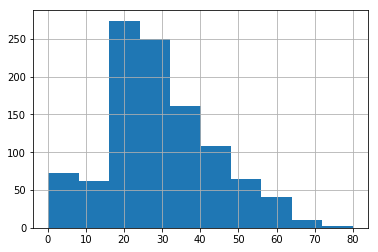

In [6]:
data.Age.hist()
plt.show

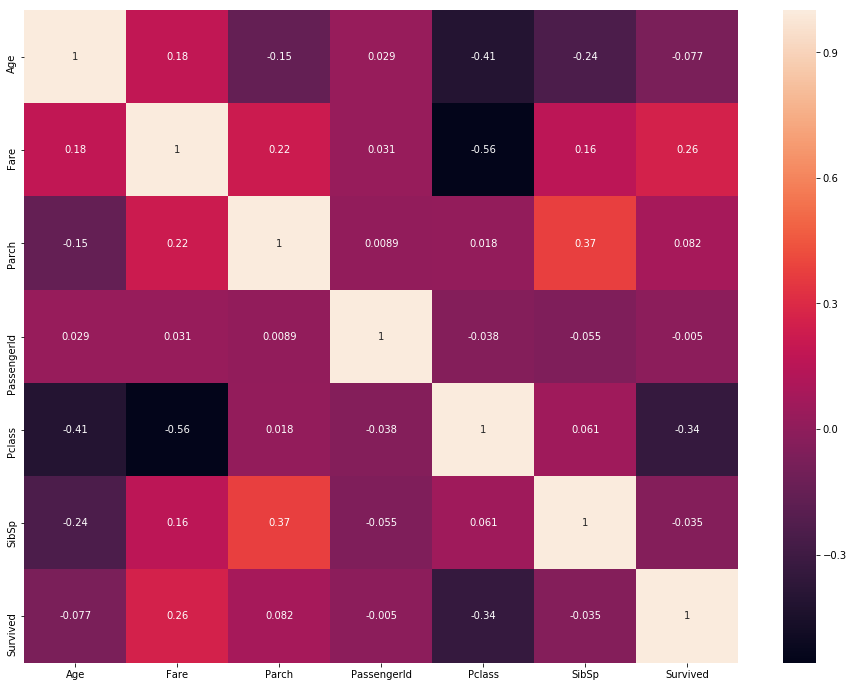

In [7]:
corr = data.corr()
fig ,ax = plt.subplots(figsize=(16,12))
fig = sns.heatmap(corr,annot=True)
plt.show()

In [8]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [9]:
sex = pd.DataFrame()
sex['Sex'] = np.where(data.Sex =='male',1,0)
sex = pd.get_dummies(data.Sex,prefix ='Sex')
embarked = pd.get_dummies(data.Embarked, prefix='Embarked')
pclass = pd.get_dummies(data.Pclass,prefix='Pclass')

In [10]:
sex

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [11]:
embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [13]:
pclass

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


In [14]:
imputed = pd.DataFrame()
imputed['Age'] = train.Age.fillna(train.Age.mean()).append(test.Age.fillna(train.Age.mean()))
imputed['Fare']  = train.Fare.fillna(train.Fare.mean()).append( test.Fare.fillna(train.Fare.mean()))
imputed

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
5,29.699118,8.4583
6,54.000000,51.8625
7,2.000000,21.0750
8,27.000000,11.1333
9,14.000000,30.0708


In [15]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

title = pd.DataFrame()
title['Title'] = data['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())
title['Name'] = title.Title.map(Title_Dictionary)
title = pd.get_dummies(title['Name'])
title

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0
7,1,0,0,0,0,0
8,0,0,0,1,0,0
9,0,0,0,1,0,0


In [16]:
cabin = pd.DataFrame()
cabin['Cabin'] = data['Cabin'].fillna('U')
cabin['Cabin'] = cabin['Cabin'].map(lambda c : c[0])
cabin = pd.get_dummies(cabin['Cabin'],prefix='Cabin')
cabin

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,1


In [18]:

family=  pd.DataFrame ()

family['FamilySize'] = data['Parch'] + data['SibSp'] + 1 

family['Family_Single'] = family['FamilySize'].map(lambda x : 1 if x == 1 else 0)
family['Family_Small'] = family['FamilySize'].map(lambda x : 1 if  2 <= x <= 4 else 0)
family['Family_Large']  = family['FamilySize'].map(lambda x : 1 if 5 <= x else 0)

del family['FamilySize']
family

,Family_Single,Family_Small,Family_Large
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
5,1,0,0
6,1,0,0
7,0,0,1
8,0,1,0
9,0,1,0


In [19]:

ticket=  pd.DataFrame ()
ticket['Ticket']=data['Ticket']
ticket = ticket.replace( '.' , '' )
ticket = ticket.replace( '/' , '' )
ticket

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
5,330877
6,17463
7,349909
8,347742
9,237736


In [20]:
data_x = pd.concat([sex,embarked,cabin,pclass],axis = 1)
train_x = data_x[:891]
train_y = data.Survived[:891]
test = data_x[891:]

In [21]:
model = RandomForestClassifier(n_estimators=500)

In [22]:
model = SVC()

In [23]:
model = GradientBoostingClassifier()

In [25]:
model = KNeighborsClassifier(n_neighbors = 1)
model=  GaussianNB ()
model = LogisticRegression()

In [27]:
model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
test_pred = model.predict(test)
passenger_id = data[891:].PassengerId
predicted = pd.DataFrame({'PassengerId': passenger_id,'Survived':test_pred})
predicted.to_csv('randomforest.csv',index=False)